In [3]:
import pypsa ;
import json ;

n1=pypsa.Network("./results/BIG/networks/elec_s_10_ec_lcopt_Co2L-4H.nc")



INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [4]:
import numpy as np
import math

In [5]:
n1.meta

{'version': '0.2.0',
 'tutorial': True,
 'logging': {'level': 'INFO', 'format': '%(levelname)s:%(name)s:%(message)s'},
 'countries': ['NG'],
 'enable': {'retrieve_databundle': True,
  'retrieve_cost_data': True,
  'download_osm_data': True,
  'build_cutout': False,
  'build_natura_raster': True},
 'run': {'name': 'BIG', 'shared_cutouts': True},
 'scenario': {'simpl': [''],
  'll': ['copt'],
  'clusters': [10],
  'opts': ['Co2L-4H'],
  'unc': ['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6']},
 'summary_dir': 'results',
 'snapshots': {'start': '2013-03-1', 'end': '2013-04-7', 'inclusive': 'left'},
 'crs': {'geo_crs': 'EPSG:4326',
  'distance_crs': 'EPSG:3857',
  'area_crs': 'ESRI:54009'},
 'retrieve_databundle': {'show_progress': False},
 'augmented_line_connection': {'add_to_snakefile': False,
  'connectivity_upgrade': 2,
  'new_line_type': ['HVAC'],
  'min_expansion': 1,
  'min_DC_length': 600},
 'cluster_options': {'simplify_network': {'to_substations': False,
   'algorithm': 'kmeans',
   '

(<matplotlib.collections.PatchCollection at 0x2653b024280>,
 <matplotlib.collections.LineCollection at 0x2653b0279d0>)

e:\installs\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


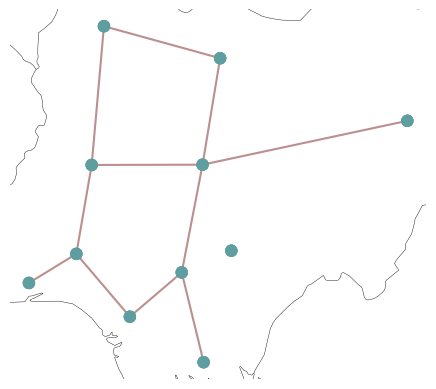

In [6]:
n1.plot()

In [7]:
n1.statistics()


Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Combined-Cycle Gas     1.713655e-01         1.417680e+08   
            Onshore Wind           8.941773e-02         5.877487e+04   
            Open-Cycle Gas         7.880494e-02         2.715613e+08   
            Solar                  7.223152e-01         2.376824e+08   
            load                   2.203789e-20         0.000000e+00   
Line        AC                     3.012338e-01         2.730501e+08   
Link        H2 electrolysis                 NaN         0.000000e+00   
            H2 fuel cell                    NaN         0.000000e+00   
            battery charger                 NaN         0.000000e+00   
            battery discharger              NaN         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam                 NaN         0.000000e+00   
Store       Battery Storage                 NaN         0.000000e+00   
            Hydrogen Storage                NaN         0.000000e+00   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Combined-Cycle Gas     0.000000        1.431599e+03   
            Onshore Wind           0.476211        6.116906e-01   
            Open-Cycle Gas         0.000000        6.021930e+03   
            Solar                968.008923        2.580307e+01   
            load                   0.000000        1.100000e+10   
Line        AC                          NaN        2.810807e+04   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        1.905414e+03   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Combined-Cycle Gas             9.534692e+03      1.431599e+03   
            Onshore Wind                   1.336628e-03      6.116910e-01   
            Open-Cycle Gas                 2.540499e+04      6.021924e+03   
            Solar                          9.690688e+01      6.676083e+03   
            load                           8.615958e-11      1.100000e+10   
Line        AC                                      NaN      2.230052e+04   
Link        H2 electrolysis                0.000000e+00      0.000000e+00   
            H2 fuel cell                   0.000000e+00      0.000000e+00   
            battery charger                0.000000e+00      0.000000e+00   
            battery discharger             0.000000e+00      0.000000e+00   
Load        -                                       NaN               NaN   
StorageUnit Reservoir & Dam                0.000000e+00      1.905414e+03   
Store       Battery Storage                0.000000e+00      0.000000e+00   
            Hydrogen Storage               0.000000e+00      0.000000e+00   

                                     Revenue        Supply    Withdrawal  
            carrier                                                       
Generator   Combined-Cycle Gas  1.575904e+04  2.453267e+02  0.000000e+00  
            Onshore Wind        2.603831e+00  5.469602e-02  0.000000e+00  
            Open-Cycle Gas      3.049805e+04  4.745573e+02  0.000000e+00  
            Solar               2.722954e+04  4.822236e+03  0.000000e+00  
            load               -6.029460e-10  1.638090e-13 -7.860779e-14  
Line        AC                  2.855325e+03  6.

In [8]:
n1.statistics()[[x != 0 and not math.isnan(x) for x in n1.statistics()['Capital Expenditure']]]['Capital Expenditure'].loc["Generator"].drop("Solar")

carrier
Combined-Cycle Gas    1.417680e+08
Onshore Wind          5.877487e+04
Open-Cycle Gas        2.715613e+08
Name: Capital Expenditure, dtype: float64

In [9]:
n1.statistics()['Capital Expenditure'].loc["Generator"].drop('load')

carrier
Combined-Cycle Gas    1.417680e+08
Onshore Wind          5.877487e+04
Open-Cycle Gas        2.715613e+08
Solar                 2.376824e+08
Name: Capital Expenditure, dtype: float64

In [10]:
n1.statistics().describe()

,Capacity Factor,Capital Expenditure,Curtailment,Installed Capacity,Operational Expenditure,Optimal Capacity,Revenue,Supply,Withdrawal
count,6.000000e+00,1.300000e+01,6.000000,1.300000e+01,12.000000,1.300000e+01,1.400000e+01,10.000000,1.000000e+01
mean,2.271895e-01,7.108619e+07,161.414189,8.461567e+08,2919.716061,8.461568e+08,1.090637e+04,1225.984592,-1.225985e+03
std,2.631967e-01,1.151813e+08,395.149152,3.050850e+09,7592.080138,3.050850e+09,2.164626e+04,2441.221764,2.599412e+03
min,2.203789e-20,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-6.029460e-10,0.000000,-6.717671e+03
25%,8.145814e-02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-5.895584e-14
50%,1.303916e-01,0.000000e+00,0.000000,6.116906e-01,0.000000,6.116910e-01,0.000000e+00,0.027348,0.000000e+00
75%,2.687667e-01,1.417680e+08,0.357158,1.905414e+03,24.227722,6.021924e+03,1.253311e+04,417.249693,0.000000e+00
max,7.223152e-01,2.730501e+08,968.008923,1.100000e+10,25404.992655,1.100000e+10,7.634457e+04,6717.671138,0.000000e+00


In [11]:
n1.generators.columns

Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'p_nom_extendable', 'carrier', 'bus',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')

In [12]:
n1.buses.head(10)

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NG0 0,300.0,NG,6.914892,7.066258,Slack,NG0 0 OCGT,AC,,None,1.0,0.0,inf,
NG0 1,300.0,NG,7.389775,9.523867,PQ,,AC,,None,1.0,0.0,inf,
NG0 2,300.0,NG,5.732033,6.056000,PQ,,AC,,None,1.0,0.0,inf,
NG0 3,300.0,NG,7.414267,5.019233,PQ,,AC,,None,1.0,0.0,inf,
NG0 4,300.0,NG,12.060480,10.524290,PQ,,AC,,None,1.0,0.0,inf,
NG0 5,300.0,NG,4.511129,7.489700,PQ,,AC,,None,1.0,0.0,inf,
NG0 6,300.0,NG,7.790400,11.951400,PQ,,AC,,None,1.0,0.0,inf,
NG0 7,300.0,NG,4.861125,9.517175,PQ,,AC,,None,1.0,0.0,inf,
NG0 8,300.0,NG,3.429873,6.826991,PQ,,AC,,None,1.0,0.0,inf,


In [13]:
n1.lines

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,NG0 0,NG0 1,2.368421,347.779326,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,14339.863463,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,NG0 0,NG0 2,3.250000,215.394003,Al/St 240/40 4-bundle 380.0,0.7,5518.833488,8883.959621,True,4356.973806,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,NG0 0,NG0 3,1.184211,292.775421,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,12074.208271,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,NG0 1,NG0 4,0.881579,654.222234,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,26974.715558,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,NG0 1,NG0 6,0.881579,341.817636,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,14095.888735,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
6,NG0 1,NG0 7,1.184211,346.625845,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,14294.897628,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
7,NG0 2,NG0 5,1.776316,260.971155,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,10761.229476,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
8,NG0 5,NG0 7,1.776316,285.883317,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,11789.295155,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
9,NG0 5,NG0 8,2.368421,175.271467,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,7227.370658,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [14]:
n1.storage_units

,max_hours,efficiency_dispatch,bus,cyclic_state_of_charge,efficiency_store,p_min_pu,carrier,p_nom,marginal_cost,build_year,...,q_set,sign,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NG0 1 hydro,6.0,0.9,NG0 1,True,0.0,0.0,hydro,592.356688,0.010384,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
NG0 7 hydro,6.0,0.9,NG0 7,True,0.0,0.0,hydro,1313.057325,0.010104,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


In [15]:
n1.carriers[n1.carriers["co2_emissions"]!=0]["co2_emissions"]

Carrier
lignite       0.41
CCGT          0.20
geothermal    0.03
OCGT          0.20
Name: co2_emissions, dtype: float64

In [16]:
n1.links.columns

Index(['bus0', 'bus1', 'carrier', 'p_nom_extendable', 'efficiency',
       'capital_cost', 'build_year', 'charger_ratio', 'type', 'lifetime',
       'p_nom', 'p_nom_min', 'p_nom_max', 'p_set', 'p_min_pu', 'p_max_pu',
       'marginal_cost', 'length', 'terrain_factor', 'ramp_limit_up',
       'ramp_limit_down', 'p_nom_opt'],
      dtype='object')

In [17]:
dir(n1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_dataframes',
 '_cCounter',
 '_investment_period_weightings',
 '_investment_periods',
 '_meta',
 '_multi_invest',
 '_retrieve_overridden_components',
 '_snapshot_weightings',
 '_snapshots',
 '_xCounter',
 'add',
 'adjacency_matrix',
 'all_components',
 'branch_components',
 'branches',
 'buses',
 'buses_t',
 'calculate_dependent_values',
 'carriers',
 'carriers_t',
 'component_attrs',
 'components',
 'consistency_check',
 'controllable_branch_components',
 'controllable_branches',
 'controllable_one_port_components',
 'copy',
 'determine_network_topology',
 'df',
 'export_to_csv_folder',
 'export_to

In [18]:
json.load(open("./resources/NG/shapes/africa_shape.geojson",'r'))

FileNotFoundError: [Errno 2] No such file or directory: './resources/NG/shapes/africa_shape.geojson'